In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#dropout ewerynode is dropout randomly at each iteration, avoid overfitting,
#robust: does not rely too much on a single node
from tensorflow.keras.optimizers import SGD
#adam ecc are already available
import time
import math

In [57]:
fname = "sequences16.csv"
sx, sy = np.loadtxt(fname, delimiter=',',
                   usecols=(0,1), unpack=True, dtype=str)
N=len(sy)
print(N)
Ls=len(sx[0])
print(Ls)

print(sx[0], sy[0])

perc_train=0.7
N_train= int(N*perc_train)
N_test = N-N_train
print(f'\ndata: {N}\ntrain: {N_train}\ntest: {N_test}')

3000
16
AAGGTCTGCCGGCCGA 1

data: 3000
train: 2100
test: 900


In [58]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc={Q[i]: i for i in range(Nc)}
print(onehc)

y = sy.astype(int)
L = Ls*Nc
print(L)#length of array feeding NN

x = np.zeros((N, L))
print(x[0])

for n in range(N):
    for i in range(Ls):
        x[n][i*4 + onehc[sx[n][i]]] = 1 #for every step in string you jump of 4 i the autoencpding
        
print(sx[0], x[0])    
print(type(y))


{'A': 0, 'C': 1, 'G': 2, 'T': 3}
64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AAGGTCTGCCGGCCGA [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
<class 'numpy.ndarray'>


## Point 1

In [59]:
x_train, y_train = x[:N_train], y[:N_train]
x_test, y_test = x[N_train:], y[N_train:]

score_train = y_train.sum()/len(y_train)
score_test = y_test.sum()/len(y_test)
print(score_train, score_test)


0.24714285714285714 0.24444444444444444


In [60]:
np.random.seed(123)

model = Sequential()
model.add(Dense(L, input_shape=(L,), activation='relu'))
model.add(Dense(L/2, activation='relu'))
model.add(Dense(L/4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_133 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_134 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_33 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/30
42/42 [==============================] - 3s 19ms/step - loss: 0.6575 - accuracy: 0.6247 - val_loss: 0.5528 - val_accuracy: 0.7556
Epoch 2/30
42/42 [==============================] - 0s 9ms/step - loss: 0.5599 - accuracy: 0.7501 - val_loss: 0.5344 - val_accuracy: 0.7556
Epoch 3/30
42/42 [==============================] - 1s 12ms/step - loss: 0.5328 - accuracy: 0.7478 - val_loss: 0.5099 - val_accuracy: 0.7544
Epoch 4/30
42/42 [==============================] - 0s 9ms/step - loss: 0.4745 - accuracy: 0.7780 - val_loss: 0.4900 - val_accuracy: 0.7556
Epoch 5/30
42/42 [==============================] - ETA: 0s - loss: 0.4757 - accuracy: 0.76 - 0s 9ms/step - loss: 0.4737 - accuracy: 0.7684 - val_loss: 0.4804 - val_accuracy: 0.7622
Epoch 6/30
42/42 [==============================] - 1s 10ms/step - loss: 0.4544 - accuracy: 0.7867 - val_loss: 0.4714 - val_accuracy: 0.7689
Epoch 7/30
42/42 [==============================] - 0s 10ms/step - loss: 0.4243 - accuracy: 0.8028 - val_loss: 0.46

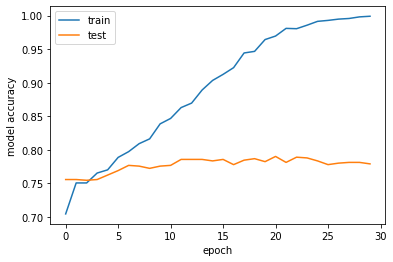

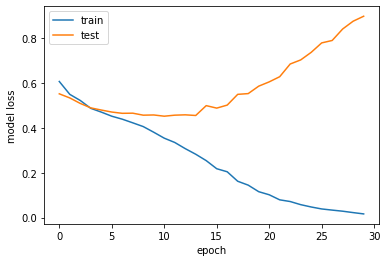

In [61]:
model.compile(loss='binary_crossentropy',
             optimizer='ADAM',
             metrics=['accuracy'])


fit = model.fit(x_train, y_train,
               epochs=30, batch_size=50,
               validation_data=(x_test, y_test),
               shuffle=True #changes composition of mini batch                                
               )


score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Data augmentation

In [62]:
sx_train = sx[:N_train]
sx_train_augm = []
y_train_augm = []

def shifting(x, positions, label):
    #function that shifts our srings
    shifted_x = []
    shifted_y =  []
    
    shifted_x.append(x)
    shifted_y.append(label)
    
    temp = x
    
    for j in range(positions):
        temp = temp[-1:]+temp[:-1]
        shifted_x.append(temp)
        shifted_y.append(label)
             
    return shifted_x, shifted_y
            
position = 15       

for i in range(len(sx_train)):
    sx_train_augm += shifting(sx_train[i], position, y_train[i])[0]
    y_train_augm += shifting(sx_train[i], position, y_train[i])[1]   

In [63]:
N_augm = len(sx_train_augm)

In [64]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc={Q[i]: i for i in range(Nc)}
print(onehc)

y = sy.astype(int)
L = Ls*Nc

print(L)#length of array feeding NN

x_train_augm = np.zeros((N_augm, L))

for n in range(N_augm):
    for i in range(Ls):
        x_train_augm[n][i*4 + onehc[sx_train_augm[n][i]]] = 1 #for every step in string you jump of 4 i the autoencpding
        
print( type(y_train_augm) )   

{'A': 0, 'C': 1, 'G': 2, 'T': 3}
64
<class 'list'>


In [65]:
np.random.seed(123)

model_aug = Sequential()
model_aug.add(Dense(L, input_shape=(L,), activation='relu'))
model_aug.add(Dense(L/2, activation='relu'))
model_aug.add(Dense(L/4, activation='relu'))
model_aug.add(Dropout(0.2))
model_aug.add(Dense(1, activation='sigmoid'))

print(model_aug.summary())

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_137 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_138 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
model_aug.compile(loss='binary_crossentropy',
             optimizer='ADAM',
             metrics=['accuracy'])


fit_aug = model_aug.fit(np.asarray(x_train_augm), np.asarray(y_train_augm),
               epochs=30, batch_size=500,
               validation_data=(x_test, y_test),
               shuffle=True #changes composition of mini batch                                
               )

score = model_aug.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
68/68 [==============================] - 2s 13ms/step - loss: 0.5936 - accuracy: 0.7124 - val_loss: 0.5137 - val_accuracy: 0.7556
Epoch 2/30
68/68 [==============================] - 1s 11ms/step - loss: 0.5170 - accuracy: 0.7516 - val_loss: 0.4782 - val_accuracy: 0.7722
Epoch 3/30
68/68 [==============================] - 1s 8ms/step - loss: 0.4891 - accuracy: 0.7701 - val_loss: 0.4625 - val_accuracy: 0.7944
Epoch 4/30
68/68 [==============================] - 1s 9ms/step - loss: 0.4682 - accuracy: 0.7818 - val_loss: 0.4329 - val_accuracy: 0.8056
Epoch 5/30
68/68 [==============================] - 1s 10ms/step - loss: 0.4299 - accuracy: 0.8022 - val_loss: 0.3882 - val_accuracy: 0.8211
Epoch 6/30
68/68 [==============================] - 1s 9ms/step - loss: 0.3941 - accuracy: 0.8231 - val_loss: 0.3615 - val_accuracy: 0.8289
Epoch 7/30
68/68 [==============================] - 1s 9ms/step - loss: 0.3522 - accuracy: 0.8454 - val_loss: 0.3340 - val_accuracy: 0.8456
Epoch 8/30
68/68 

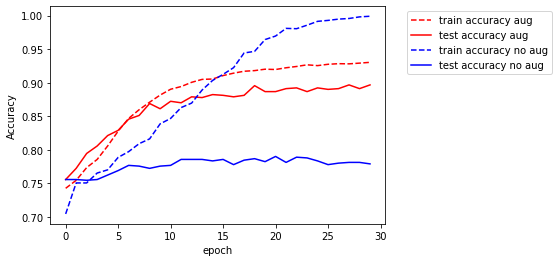

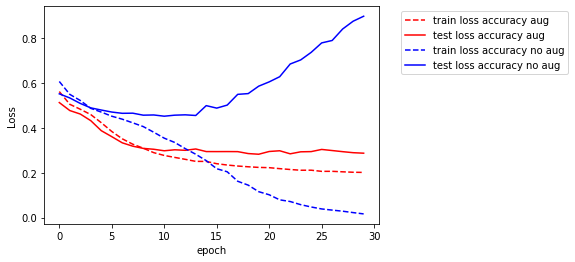

In [67]:
# look into training history

# summarize history for accuracy
plt.plot(fit_aug.history['accuracy'],
         label='train accuracy aug',
         c='red',
         ls='--'
        )
plt.plot(fit_aug.history['val_accuracy'],
         label='test accuracy aug',
         c='red'
        )
plt.plot(fit.history['accuracy'],
         label='train accuracy no aug',
         c='blue',
         ls='--'
        )
plt.plot(fit.history['val_accuracy'], label='test accuracy no aug',c='blue')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# summarize history for loss
plt.plot(fit_aug.history['loss'], label='train loss accuracy aug', c='red', ls='--')
plt.plot(fit_aug.history['val_loss'], label='test loss accuracy aug',c='red')
plt.plot(fit.history['loss'], label='train loss accuracy no aug',c='blue',ls='--')
plt.plot(fit.history['val_loss'], label='test loss accuracy no aug',c='blue')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

It enlarges the number of good samples
Podemo anca provar a cambiare el numero de shifting


## Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='RMSprop', activation='relu', dropout_rate=0.2):
    # create model
    model_grid = Sequential()
    model_grid.add(Dense(L, input_shape=(L,), activation=activation))
    model_grid.add(Dense(L/2, activation=activation))
    model_grid.add(Dropout(dropout_rate))
    model_grid.add(Dense(1, activation=activation))

    model_grid.compile(loss='binary_crossentropy',
                       optimizer=optimizer,
                       metrics=['accuracy']
                      )
    return model_grid
 
# create model 
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=30, 
                        batch_size=800,
                        verbose=1)

# list of allowed optional arguments for the optimizer, see compile_model()
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu', 'elu', 'sigmoid', 'tanh']
dropout_rate = [0.1,0.2,0.3,0.4,0.5]

# define parameter dictionary
param_grid = dict(optimizer     = optimizer,
                  dropout_rate  = dropout_rate,
                  activation    = activation
                 )
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch,
                    param_grid=param_grid,
                    n_jobs = 1,
                    cv=4)
grid_result = grid.fit(np.asarray(x_train_augm),np.asarray(y_train_augm))

In [41]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.873929 using {'optimizer': 'Nadam'}
0.816726 (0.010377) with: {'optimizer': 'SGD'}
0.872708 (0.007509) with: {'optimizer': 'RMSprop'}
0.757679 (0.013907) with: {'optimizer': 'Adagrad'}
0.752857 (0.012150) with: {'optimizer': 'Adadelta'}
0.873571 (0.011931) with: {'optimizer': 'Adam'}
0.869286 (0.007056) with: {'optimizer': 'Adamax'}
0.873929 (0.005747) with: {'optimizer': 'Nadam'}


In [131]:
shifting_list = [3, 7, 11, 15]

def shifting(x, positions, label):
    #function that shifts our strings
    shifted_x = []
    shifted_y =  []
    
    shifted_x.append(x)
    shifted_y.append(label)
    
    temp = x
    
    for j in range(positions):
        temp = temp[-1:]+temp[:-1]
        shifted_x.append(temp)
        shifted_y.append(label)
             
    return shifted_x, shifted_y

for shift in shifting_list:
    
    temp_x = []
    temp_y = []
    
    for i in range(len(sx_train)):
        temp_x += shifting(sx_train[i], shift, y_train[i])[0]
        temp_y += shifting(sx_train[i], shift, y_train[i])[1] 
    if shift == 3:
        sx_train_4 = temp_x
        y_train_4 = temp_y 
    if shift == 7:
        sx_train_8 = temp_x
        y_train_8  = temp_y 
    if shift == 11:
        sx_train_12 = temp_x
        y_train_12 = temp_y 
    if shift == 15:
        sx_train_16 = temp_x
        y_train_16 = temp_y 

In [132]:
np.random.seed(123)

model_shift = Sequential()
model_shift.add(Dense(L, input_shape=(L,), activation='relu'))
model_shift.add(Dense(L/2, activation='relu'))
model_shift.add(Dense(L/4, activation='relu'))
model_shift.add(Dropout(0.2))
model_shift.add(Dense(1, activation='sigmoid'))

print(model_shift.summary())

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_161 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_162 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_40 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None



Test loss: 0.6037580966949463
Test accuracy: 0.8411111235618591

Test loss: 0.42905381321907043
Test accuracy: 0.8611111044883728

Test loss: 0.4013690650463104
Test accuracy: 0.8700000047683716

Test loss: 0.3580036461353302
Test accuracy: 0.8777777552604675


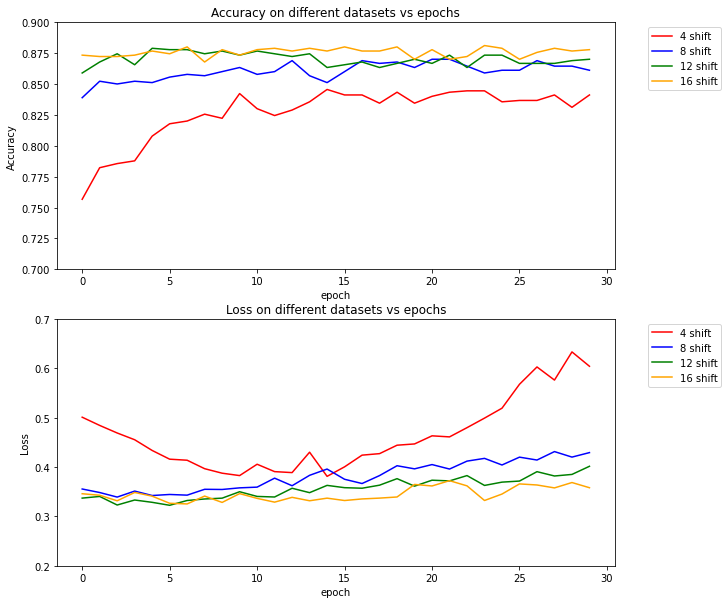

In [133]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

model_shift.compile(loss='binary_crossentropy',
                    optimizer='ADAM',
                    metrics=['accuracy'])

shifted_x_list = [sx_train_4, sx_train_8, sx_train_12, sx_train_16]
shifted_y_list = [y_train_4, y_train_8, y_train_12, y_train_16]
batch_size = [100, 300, 500, 800]
color = ['red', 'blue', 'green', 'orange']


for i in range(len(shifted_x_list)):
    
    x_train = np.zeros((len(shifted_x_list[i]), L))
    
    for j in range(len(shifted_x_list[i])):
        for k in range(Ls):
            x_train[j][k*4 + onehc[shifted_x_list[i][j][k]]] = 1 #for every step in string you jump of 4 i the autoencpding

    fit_shift = model_shift.fit(np.asarray(x_train), np.asarray(shifted_y_list[i]),
                   epochs=30, batch_size=batch_size[i],
                   validation_data=(x_test, y_test),
                   shuffle=True, #changes composition of mini batch                                
                   verbose=0)

    score = model_shift.evaluate(x_test, y_test, verbose=0)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    final = str(shifting_list[i]+1) + ' shift'
    final_2 = str(shifting_list[i]+1) + ' shift'
    ax[0].plot(fit_shift.history['val_accuracy'],
             label=final,
             c=color[i]
            )
    ax[0].set_title('Accuracy on different datasets vs epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(bbox_to_anchor=(1.05, 1))
    ax[0].set_ylim(0.7,0.9)

    # summarize history for loss
    ax[1].plot(fit_shift.history['val_loss'],
               label=final_2,
               c=color[i])
    ax[1].set_title('Loss on different datasets vs epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(bbox_to_anchor=(1.05, 1))
    ax[1].set_ylim(0.2,0.7)

aumentare del dataset è meno determinante.
Diminuendo il numero di shifts, l'assegnazione sbagliata delle etichettte è sempre più determinante. Definire bene cos'è uno shift